Loading graph from file...
[(0, 'A')]
[(3, 'C'), (5, 'B'), (6, 'D')]
[(5, 'B'), (6, 'D'), (9, 'E'), (11, 'G')]
[(6, 'D'), (11, 'G'), (9, 'E'), (12, 'F')]
[(8, 'E'), (8, 'F'), (11, 'H'), (11, 'G'), (9, 'E'), (12, 'F')]
[(8, 'F'), (9, 'E'), (11, 'H'), (11, 'G'), (12, 'F'), (14, 'I')]
[(9, 'E'), (11, 'G'), (11, 'H'), (14, 'I'), (12, 'F'), (12, 'J')]
[(11, 'G'), (12, 'F'), (11, 'H'), (14, 'I'), (12, 'J')]
[(11, 'H'), (12, 'F'), (12, 'J'), (14, 'I'), (17, 'K')]
[(12, 'F'), (14, 'I'), (12, 'J'), (17, 'K')]
[(12, 'J'), (14, 'I'), (17, 'K')]
[(14, 'I'), (17, 'K')]
[(17, 'K')]
Shortest path from A to J: ['A', 'D', 'F', 'J']
Total distance: 12


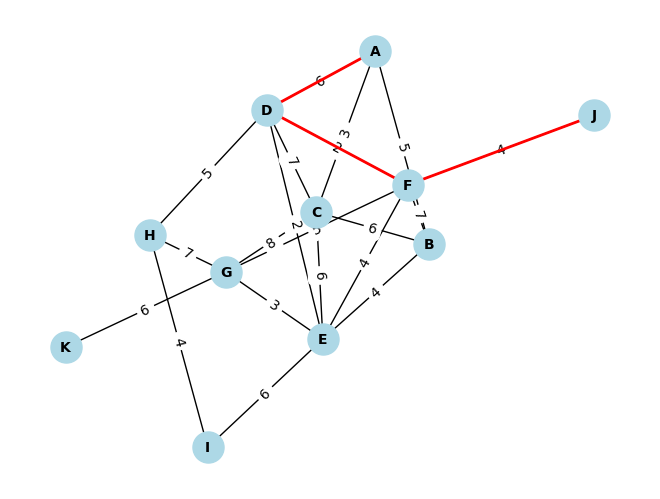

In [1]:
import heapq
import matplotlib.pyplot as plt
import networkx as nx

def load_graph_from_file(filename):
    """Loads the graph from a text file."""
    graph = {}
    edges = []
    with open(filename, 'r') as file:
        for line in file:
            parts = line.strip().split(',')
            place1, place2, distance = parts[0], parts[1], int(parts[2])

            if place1 not in graph:
                graph[place1] = {}
            if place2 not in graph:
                graph[place2] = {}

            graph[place1][place2] = distance
            graph[place2][place1] = distance

            edges.append((place1, place2, distance))
    return graph, edges

def dijkstra(graph, start, end):
    distances = {node: float('inf') for node in graph}
    distances[start] = 0
    
    priority_queue = [(0, start)]
    previous_nodes = {node: None for node in graph}

    while priority_queue:
        print(priority_queue)
        current_distance, current_node = heapq.heappop(priority_queue)

        if current_distance > distances[current_node]:
            continue

       
        for neighbor, weight in graph[current_node].items():
            distance = current_distance + weight

            
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                previous_nodes[neighbor] = current_node
                heapq.heappush(priority_queue, (distance, neighbor))

    
    path = []
    current = end
    while current is not None:
        path.append(current)
        current = previous_nodes[current]
    path.reverse()

    return path, distances[end]

def draw_graph(edges, shortest_path):
    G = nx.Graph()
    for edge in edges:
        G.add_edge(edge[0], edge[1], weight=edge[2])

    pos = nx.spring_layout(G)
    labels = nx.get_edge_attributes(G, 'weight')

    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10, font_weight='bold')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

    # Highlight the shortest path
    path_edges = [(shortest_path[i], shortest_path[i+1]) for i in range(len(shortest_path) - 1)]
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=2)

    plt.show()


filename = 'places.txt'
print("Loading graph from file...")
graph, edges = load_graph_from_file(filename)

start_place = input("Enter the starting place: ").capitalize()
end_place = input("Enter the destination place: ").capitalize()

if start_place in graph and end_place in graph:
    shortest_path, total_distance = dijkstra(graph, start_place, end_place)
    print(f"Shortest path from {start_place} to {end_place}: {shortest_path}")
    print(f"Total distance: {total_distance}")

    draw_graph(edges, shortest_path)
else:
    print("One or both places are not in the graph.")